In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd '/content/drive/My Drive/Colab Notebooks/CS 249/project/sequential-reptile'

/content/drive/My Drive/Colab Notebooks/CS 249/project/sequential-reptile


In [4]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/CS 249/project/sequential-reptile')

In [5]:
from calendar import c
from datagen.algorithms import info, gen_multi_algo_data
from datagen.graphgen import gen_erdos_renyi, gen_barabasi_albert, gen_twod_grid
import torch, pdb, logging, sys
from loss import LossAssembler, create_loss_class
import model as arch
import initialisation as init
from train import train, train_metadata
import evaluate as ev
from torch.utils.data import DataLoader
from tqdm import tqdm
from baselines import run_multi, run_seq_reptile
from logger import _logger
from get_streams import multi_stream, seq_reptile_stream
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(10)

task = 'bfs bf'
algo_names = ['bfs']
task_list = ['bfs'] # or noalgo_?

ngraph_train = '100'
ngraph_val = '100'
ngraph_test = ['200', '200']

nnode = '20'
nnode_test = ['20', '50']

data_folder = 'Data'
graph = 'erdosrenyi'
log_file = 'multi.log'

# gen_erdos_renyi_algo_results(rand_gen, ngraph_train, nnode, algo_names, f'{data_folder}/train')
# gen_erdos_renyi_algo_results(rand_gen, ngraph_val, nnode, algo_names, f'{data_folder}/val')
# for i in range(len(nnode_test)):
#     gen_erdos_renyi_algo_results(rand_gen, ngraph_test[i], nnode_test[i], algo_names, 'Data/test')
                    
device = 'cuda'
latentdim = 32
encdim = 32 
noisedim = 0

train_params = {}
train_params['optimizer'] = 'adam'
train_params['epochs'] = 200
train_params['lr'] = 1e-4
train_params['warmup'] = 0
train_params['earlystop'] = False
train_params['patience'] = 2
train_params['weightdecay'] = 0.00001
train_params['schedpatience'] = 0
train_params['tempinit'] = 1.0
train_params['temprate'] = 1.0
train_params['tempmin'] = 1.0
train_params['earlytol'] = 1e-4
train_params['ksamples'] = 1
train_params['task'] = task
train_params['batchsize'] = 50

#for adaptive scheduling
train_params['exponent'] = 1.0

#for seq reptile 
train_params['K'] = 5
train_params['alpha'] = 1e-4


logger = _logger(logfile=f'{data_folder}/{log_file}')
metadata = info(logger, algo_names)
model = arch.NeuralExecutor3(device,
                              metadata['nodedim'],
                              metadata['edgedim'],
                              latentdim,
                              encdim,
                              pred=metadata['pred'],
                              noise=noisedim)
train_stream, val_stream, test_stream = multi_stream(ngraph_train, ngraph_val, 
                                                    nnode, logger, algo_names,
                                                    ngraph_test, nnode_test, graph=graph,
                                                    batchsize=train_params['batchsize'], data_folder=data_folder)
add_info = run_multi(model, logger, task_list, train_stream, val_stream, train_params, test_stream, device=device, verbose=True)


# logger = _logger(logfile='Data/seq_reptile.log')
# metadata = info(logger, algo_names)
# model = arch.NeuralExecutor3_(device,
#                               metadata['nodedim'],
#                               metadata['edgedim'],
#                               latentdim,
#                               encdim,
#                               algo_names,
#                               pred=metadata['pred'],
#                               noise=noisedim
#                               )

# train_stream, val_stream, test_stream = seq_reptile_stream(ngraph_train, ngraph_val, nnode, logger, algo_names,
#                  ngraph_test, nnode_test, batchsize=train_params['batchsize'])

# run_seq_reptile(model, logger, task_list, train_stream, val_stream, train_params, test_stream)

100%|██████████| 200/200 [00:55<00:00,  3.61it/s]


<class 'torch.Tensor'>
400


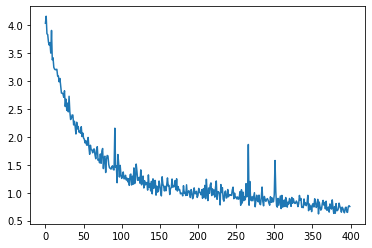

In [6]:
torch.manual_seed(10)

task = 'bfs'
algo_names = ['bfs']
task_list = ['bfs'] # or noalgo_?

ngraph_train = '100'
ngraph_val = '100'
ngraph_test = ['100']

nnode = '20'
nnode_test = ['20']

data_folder = 'Data'
graph = 'erdosrenyi'

device = 'cuda'
latentdim = 32
encdim = 32 
noisedim = 0

train_params = {}
train_params['optimizer'] = 'adam'
train_params['epochs'] = 150
train_params['lr'] = 1
train_params['warmup'] = 0
train_params['earlystop'] = False
train_params['patience'] = 1
train_params['weightdecay'] = 0.00001
train_params['schedpatience'] = 0
train_params['tempinit'] = 1.0
train_params['temprate'] = 1.0
train_params['tempmin'] = 1.0
train_params['earlytol'] = 5e-5
train_params['ksamples'] = 1
train_params['task'] = task
train_params['batchsize'] = 100

#for seq reptile 
train_params['K'] = 10
train_params['alpha'] = 0.0005

#for adaptive scheduling
train_params['exponent'] = 1.0

train_mode = 'seq_reptile'

                                
if train_mode == "multi":
  log_file = 'multi.log'
  logger = _logger(logfile=f'{data_folder}/{log_file}')
  metadata = info(logger, algo_names)
  model = arch.NeuralExecutor3(device,
                                metadata['nodedim'],
                                metadata['edgedim'],
                                latentdim,
                                encdim,
                                pred=metadata['pred'],
                                noise=noisedim)
  train_stream, val_stream, test_stream = multi_stream(ngraph_train, ngraph_val, 
                                                      nnode, logger, algo_names,
                                                      ngraph_test, nnode_test, graph=graph,
                                                      batchsize=train_params['batchsize'], data_folder=data_folder)
  add_info = run_multi(model, logger, task_list, train_stream, val_stream, train_params, test_stream, device=device, verbose=True)

elif train_mode == "seq_reptile": 
  log_file = 'seq_reptile.log'
  logger = _logger(logfile='Data/seq_reptile.log')
  metadata = info(logger, algo_names)
  train_stream, val_stream, test_stream = seq_reptile_stream(ngraph_train, ngraph_val, nnode, logger, algo_names,
                  ngraph_test, nnode_test, batchsize=train_params['batchsize'])
  model = arch.NeuralExecutor3_(device,
                              metadata['nodedim'],
                              metadata['edgedim'],
                              latentdim,
                              encdim,
                              algo_names,
                              pred=metadata['pred'],
                              noise=noisedim
                              ) 
  add_info = run_seq_reptile(model, logger, task_list, train_stream, val_stream, train_params, test_stream, device=device, verbose=True)

100%|██████████| 150/150 [02:57<00:00,  1.18s/it]


<class 'torch.Tensor'>
1500


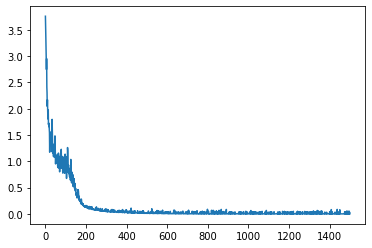

In [7]:
loss = add_info['loss_traject']
loss = [sum(x) for x in loss]
print(type(loss[0]))
print(len(loss))
loss = [x.cpu().detach().numpy() for x in loss]
x = [i for i in range(len(loss))]
plt.plot(x, loss)

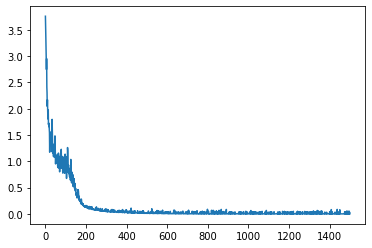

In [8]:
loss = [x if x < 10 else 0 for x in loss] # filter 
plt.plot(x, loss)

In [6]:
!git add .
!git commit -m "add Adam support for inner optimizer"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@c39b3500f56c.(none)')
